# Análisis del Consumo de Energía en los Estados Unidos (1973-2024)

**Autor:** Juan Manuel Martínez Estrada  
**Fecha:** 2025-05-02  
**Versión:** 1.0  

---

# 2. Limpieza y Preprocesamiento de Datos - Consumo Energía Renovable EE.UU.

---

## Objetivos del Notebook
* Corregir tipos de datos (datetime, numéricos, categóricos).
* Manejar valores especiales (ceros) y valores faltantes (NaNs).
* Realizar validaciones de consistencia.
* Guardar el dataset limpio y procesado para análisis posteriores.

# 2.1. Configuración del Entorno

* Importación de librerias (pandas, numpy)

In [43]:
import pandas as pd
import numpy as np
import missingno as mn
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

* Definición de rutas (datos crudos de entrada, datos procesados de salida).

In [44]:
import os
import sys

# Definiendo el path o ruta hacia el dataset original
data_path = os.path.join('..', 'data', '01_raw', 'dataset.csv')

# Verificamos si el archivo existe
if not os.path.exists(data_path):
    print(f"El archivo {data_path} no existe.")
    sys.exit(1)

* Carga de dataset crudo

In [45]:
# Cargamos el dataset
df = pd.read_csv(data_path, sep=',', encoding='utf-8')

## 2.2. Corrección de Tipos de Datos

* Combinar `Year` y `Month` en una columna `datetime`.

In [46]:
df['Day'] = 1  # asigna el primer día del mes
if 'datetime' not in df.columns:
    if 'Year' in df.columns and 'Month' in df.columns:
        df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day']], format='%Y-%m-%d')  # crea una nueva columna con la fecha
        df = df.drop(columns=['Year', 'Month', 'Day'])  # elimina la columna 'Day'
        df.set_index('datetime', inplace=True)  # establece la columna 'datetime' como índice

# Comprobando la información del dataset
df.head(10)  # Mostramos las primeras 10 filas del dataset


,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
datetime,,,,,,,,,,,,,,,
1973-01-01,Commerical,0.000,0.000,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0
1973-01-01,Electric Power,0.000,0.490,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0
1973-01-01,Industrial,1.040,0.000,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0
1973-01-01,Residential,0.000,0.000,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0
1973-01-01,Transportation,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0
1973-02-01,Commerical,0.000,0.000,0.0,0.0,0.515,0.000,0.0,0.0,0.515,0.515,0.0,0.0,0.000,0.0
1973-02-01,Electric Power,0.000,0.448,0.0,0.0,0.157,0.144,0.0,0.0,0.301,79.331,0.0,0.0,78.582,0.0
1973-02-01,Industrial,0.962,0.000,0.0,0.0,89.359,0.000,0.0,0.0,89.359,90.320,0.0,0.0,0.000,0.0
1973-02-01,Residential,0.000,0.000,0.0,0.0,27.164,0.000,0.0,0.0,0.000,27.164,0.0,0.0,0.000,0.0


* Convertir columna `Sector` a tipo `category`.

In [47]:
# Convirtiendo 'Sector' a tipo categórico
df['Sector'] = df['Sector'].astype('category')  # convierte la columna 'Sector' a tipo categórico
df.dtypes  # muestra la información del DataFrame para verificar el cambio de tipo de dato

Sector                                category
Hydroelectric Power                    float64
Geothermal Energy                      float64
Solar Energy                           float64
Wind Energy                            float64
Wood Energy                            float64
Waste Energy                           float64
Fuel Ethanol, Excluding Denaturant     float64
Biomass Losses and Co-products         float64
Biomass Energy                         float64
Total Renewable Energy                 float64
Renewable Diesel Fuel                  float64
Other Biofuels                         float64
Conventional Hydroelectric Power       float64
Biodiesel                              float64
dtype: object

## 2.4. Manejo de Valores Especiales (Ceros como Nulos)

* Identificar las columnas de consumo de energía

In [48]:
consumption_columns = [
    'Hydroelectric Power', 'Geothermal Energy', 'Solar Energy',
    'Wind Energy', 'Wood Energy', 'Waste Energy',
    'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products',
    'Biomass Energy', 'Total Renewable Energy', 'Renewable Diesel Fuel',
    'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel' 
]

* Reemplazar valores `0` por `np.nan` en estas columnas, justificando según la descripción del dataset.

In [49]:
# Reemplazando los ceros '0' por NaN
df[consumption_columns] = df[consumption_columns].replace(0, np.nan)  # reemplaza los ceros por NaN en las columnas de consumo
# Verificando si hay valores NaN en las columnas de consumo
df[consumption_columns].isna().sum()  # muestra la cantidad de valores NaN en cada columna de consumo

Hydroelectric Power                   2040
Geothermal Energy                     1189
Solar Energy                          1330
Wind Energy                           2274
Wood Energy                            613
Waste Energy                          1514
Fuel Ethanol, Excluding Denaturant    1514
Biomass Losses and Co-products        2548
Biomass Energy                         709
Total Renewable Energy                 613
Renewable Diesel Fuel                 2908
Other Biofuels                        2944
Conventional Hydroelectric Power      2452
Biodiesel                             2788
dtype: int64

* Guardado de dataset intermediate

In [50]:
# Guardando el DataFrame limpio en un nuevo archivo CSV
output_path = os.path.join('..', 'data', '02_intermediate', 'dataset_intermediate.csv')  # define la ruta de salida
if not os.path.exists(os.path.dirname(output_path)):
    os.makedirs(os.path.dirname(output_path))  # crea el directorio si no existe
df.to_csv(output_path, index=True)  # guarda el DataFrame limpio en un nuevo archivo CSV    
print(f"El DataFrame limpio se ha guardado en {output_path}.")  # mensaje de confirmación

El DataFrame limpio se ha guardado en ..\data\02_intermediate\dataset_intermediate.csv.


## 2.5. Análisis y Tratamiento de Valores Faltantes (NaNs)

Tal como se menciona en la descripción del dataset, es importante considerar que los valroes correspondientes a cero `0`, no corresponden a consumos de energía realies, si no que representan la ausencia de consumo de energía en un determinado intervalo de tiempo o al no reporte de datos. Por lo tanto, los valores de cero deben ser excluidos del analisis y se justificara esta acción de acuerdo a los acontesimientos historicos.

* Visualizar patrones de valores faltantes (`missingno`).

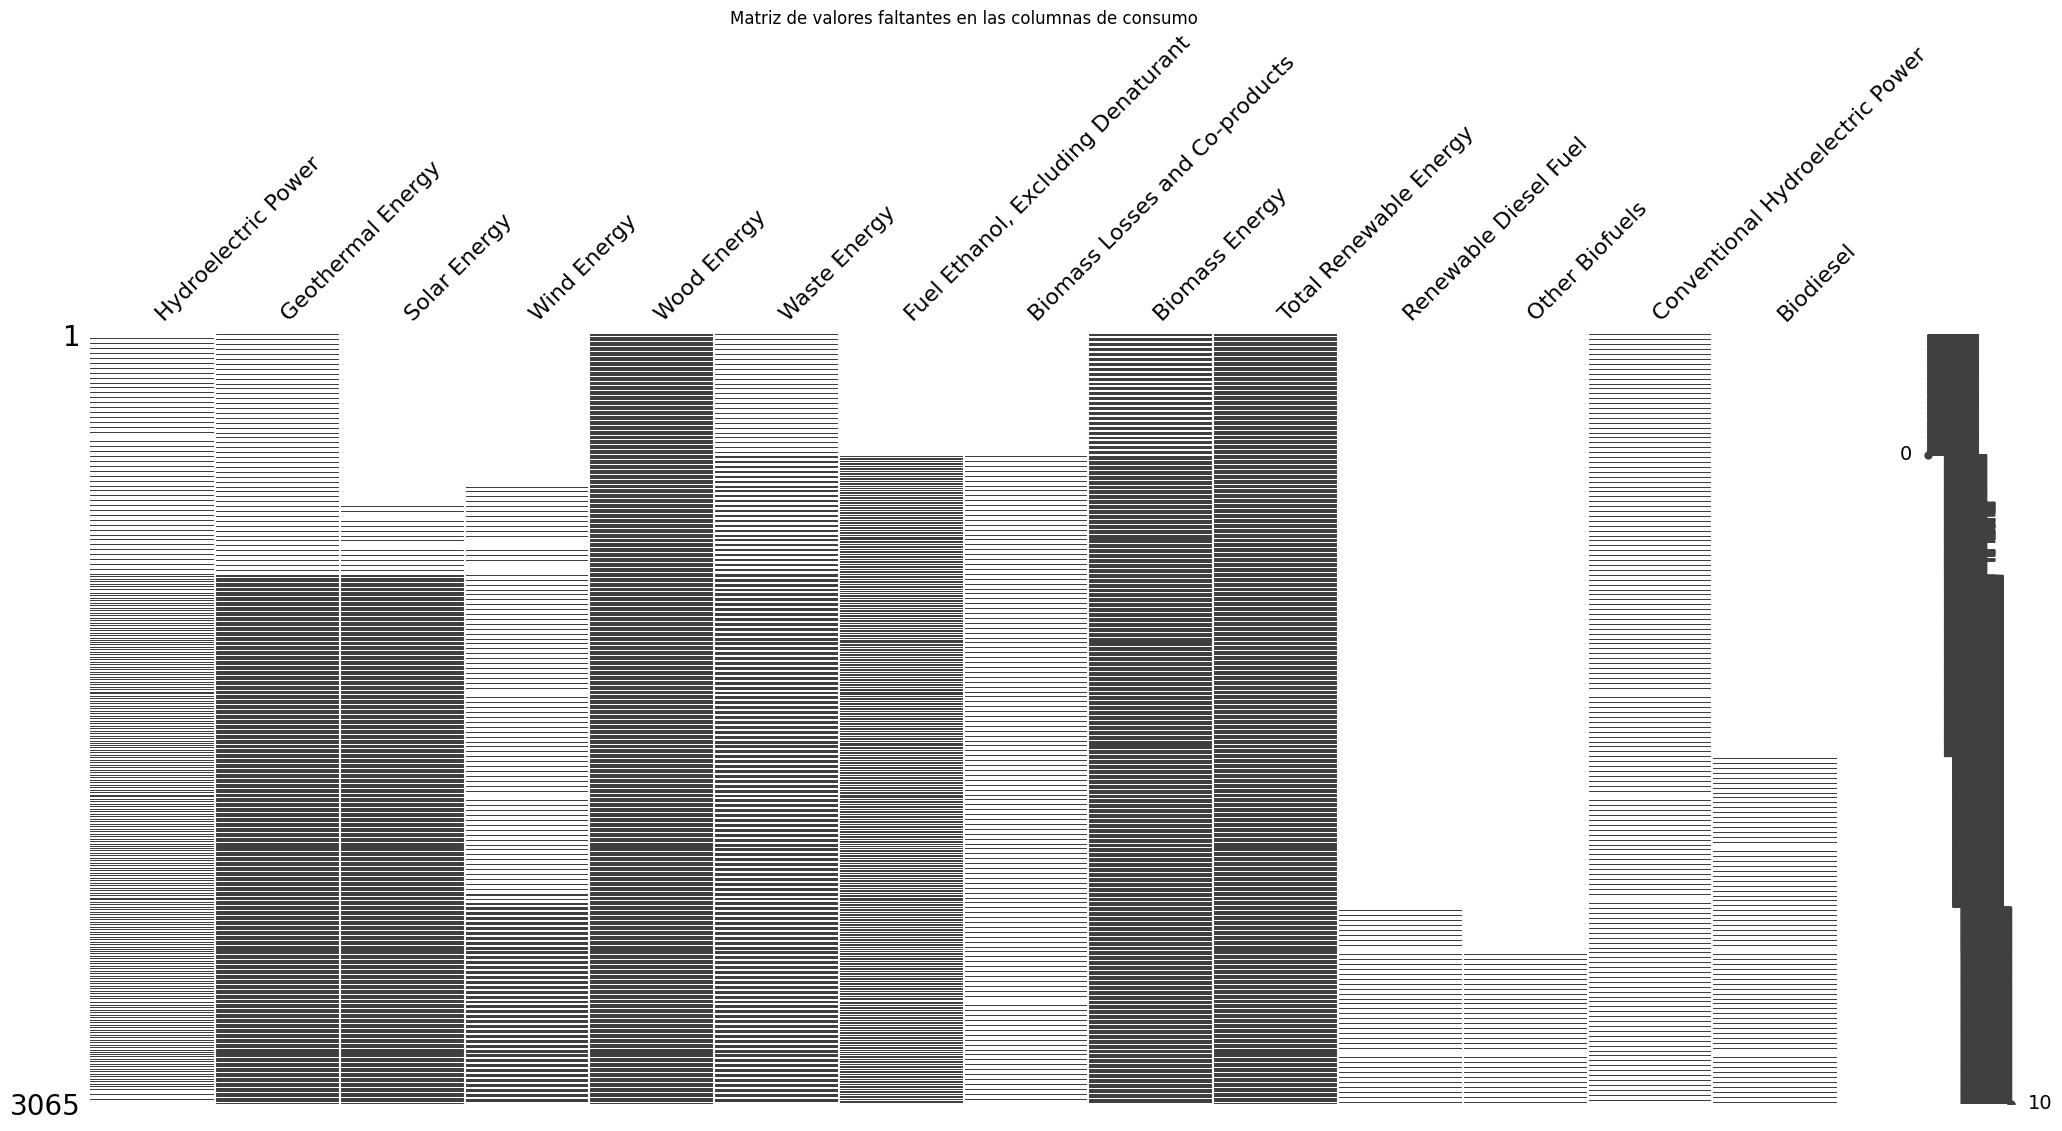

In [51]:
mn.matrix(df[consumption_columns])  # visualiza la matriz de valores faltantes
plt.title('Matriz de valores faltantes en las columnas de consumo')  # título del gráfico
plt.show()  # muestra el gráfico

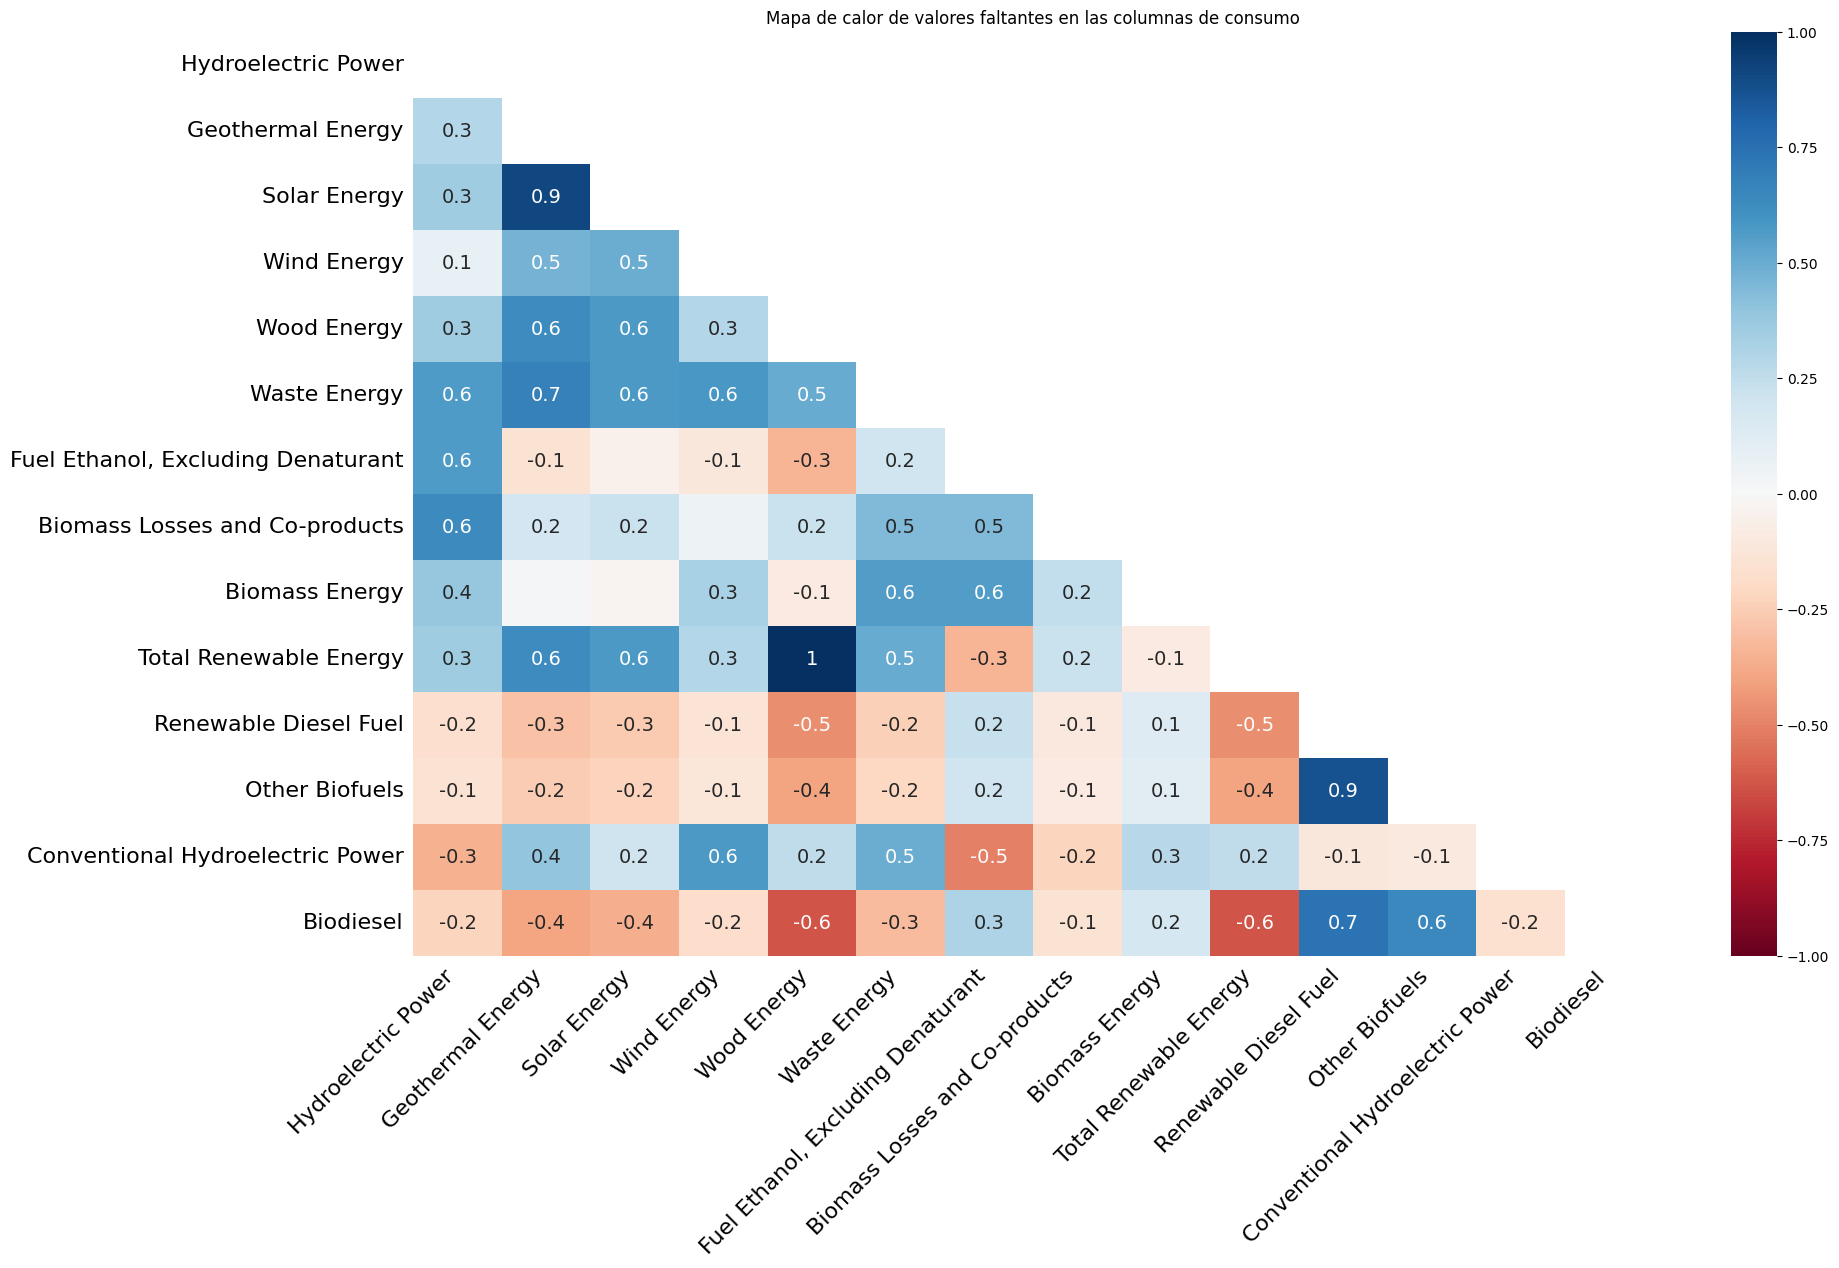

In [52]:
mn.heatmap(df[consumption_columns])  # visualiza el mapa de calor de valores faltantes
plt.title('Mapa de calor de valores faltantes en las columnas de consumo')  # título del gráfico
plt.show()  # muestra el gráfico

c:\Users\PC\Documents\Ingenieria\Semestre 6\Topicos Especiales\Analisis_de_Datos\us_renewable_energy_analysis\venv\Lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


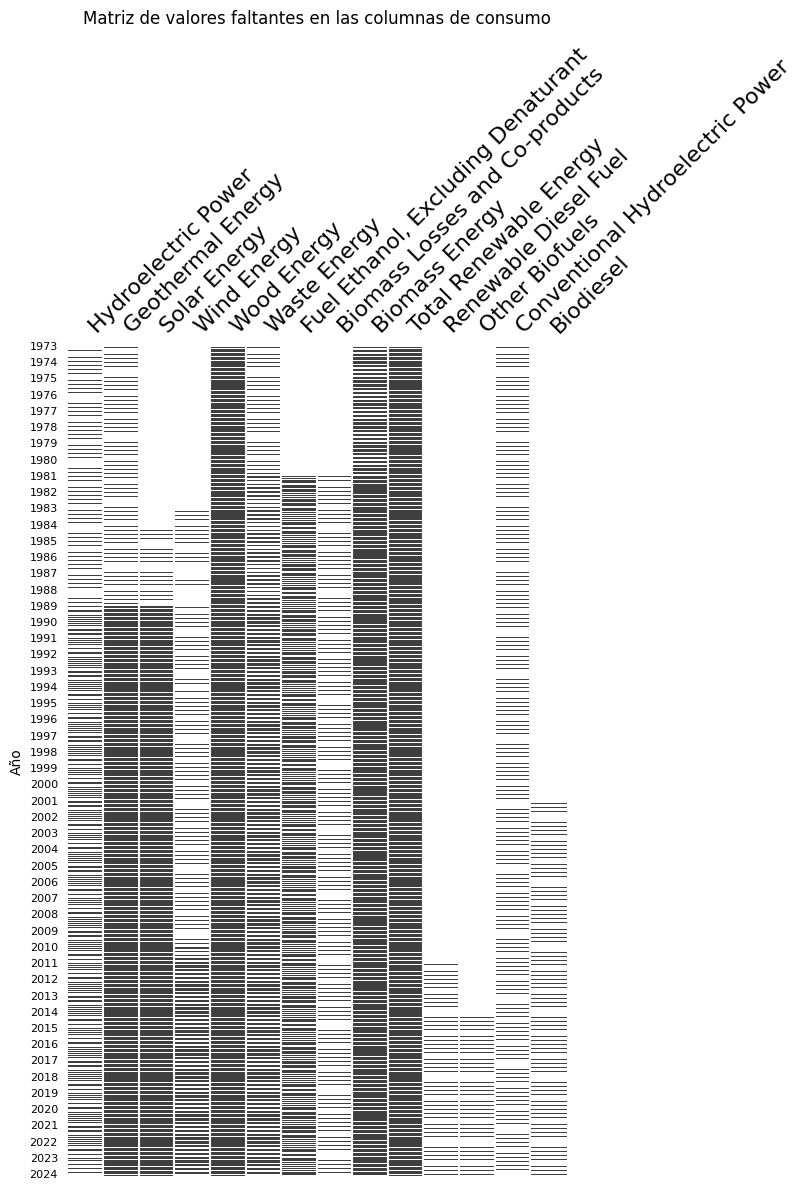

In [53]:
# 2) Dibuja la matriz de missing values
fig, ax = plt.subplots(figsize=(8, 12))
mn.matrix(df[consumption_columns], ax=ax)

# 3) Calcula posiciones buscando la primera fila para cada 1-enero
positions = []
labels    = []
years = range(1973, 2025)
for y in years:
    ts = pd.Timestamp(f'{y}-01-01')
    # obtén todas las posiciones donde el índice == ts
    locs = np.where(df.index == ts)[0]
    if locs.size > 0:
        positions.append(locs[0])  # primeras aparición
        labels.append(y)

# 4) Fija ticks y etiquetas
ax.set_yticks(positions)
ax.set_yticklabels(labels, fontsize=8, rotation=0, va='center')

# 5) Invierte el eje Y
ax.set_ylim(len(df), 0)

# 6) Ajustes finales
ax.set_ylabel('Año', fontsize=10)
ax.set_title('Matriz de valores faltantes en las columnas de consumo', pad=15)
plt.tight_layout()
plt.show()


### **Hallazgo Notable:**

En la gráfica de la matriz de valores faltantes se aprecia que las energías provenientes de hidroeléctricas, geotérmicas, dendroenergía, energía de residuos, plantas de biomasa y derivados, presentan una cobertura de datos más amplia a lo largo del tiempo, especialmente desde los años setenta. Por el contrario, tecnologías como la solar, eólica, biodiésel y otros biocombustibles muestran grandes vacíos en los primeros años, comenzando a registrar datos de manera más consistente a partir de los 80's o 2000.

### **Diagnóstico y Estrategia**

El análisis de la matriz de valores faltantes reveló un patrón característico en las series temporales de energía: ausencia de datos en los períodos iniciales para ciertas tecnologías energéticas emergentes. Este patrón es coherente con la evolución histórica del sector energético en Estados Unidos, donde diversas fuentes de energía comenzaron a implementarse o medirse en diferentes momentos durante el período analizado.

### **Metodología de Imputación**

Para abordar esta situación, se implementó una estrategia de imputación en dos fases:

1. **Interpolación lineal**: Para los valores faltantes intermedios dentro de períodos donde la tecnología ya estaba operativa.

2. **Asignación de valor cero**: Para los períodos anteriores a la primera medición válida de cada tecnología, asumiendo que representan períodos donde la tecnología aún no estaba implementada o su contribución era estadísticamente insignificante.

* **Imputación de Datos**

In [54]:
# 1. Crear una copia para no modificar el df original directamente en este paso exploratorio
df_imputed = df.copy()

# 2. Iterar por cada columna de consumo
for column in consumption_columns:
    # Encontrar el índice (fecha) de la primera observación válida (no NaN)
    first_valid_index = df_imputed[column].first_valid_index()

    if first_valid_index is not None:
        # Si hay al menos un valor válido en la columna:

        # a) Poner a CERO todos los valores ANTES de la primera observación válida real.
        # Esto corrige la interpolación que pudo haber rellenado NaNs al inicio de la serie
        # donde la tecnología aún no existía o no se medía.
        df_imputed.loc[:first_valid_index, column] = df_imputed.loc[:first_valid_index, column].fillna(0)

        # b) Interpolar todo en la columna (esto llenará huecos INTERNOS)
        df_imputed.loc[first_valid_index:, column] = df_imputed.loc[first_valid_index:, column].interpolate(method='linear', limit_direction='both')

    else:
        # Si TODA la columna es NaN (ningún valor válido), puedes decidir rellenarla con 0
        # o dejarla como NaN, dependiendo de cómo quieras tratar una fuente sin datos.
        df_imputed[column] = df_imputed[column].fillna(0)

# Verificación:
# Comprueba algunas columnas donde sabías que había muchos NaNs al principio, ej. 'Solar Energy'
# print(df_imputed[['Solar Energy', 'Wind Energy']].head(20)) # Ajusta el número de filas según necesites
print(df_imputed.loc['2014':'2015', ['Solar Energy', 'Wind Energy', 'Other Biofuels']]) # Revisa un rango específico

            Solar Energy  Wind Energy  Other Biofuels
datetime                                             
2014-01-01        1.0780     0.032000           0.000
2014-01-01        2.5050    61.056000           0.000
2014-01-01        0.2130     0.024000           0.000
2014-01-01        4.3610     0.024667           0.000
2014-01-01        2.7635     0.025333           0.092
...                  ...          ...             ...
2015-12-01        1.2720     0.041000           0.162
2015-12-01        5.2720    68.514000           0.171
2015-12-01        0.3220     0.021000           0.180
2015-12-01        5.6800     0.026667           0.189
2015-12-01        3.4760     0.032333           0.198

[120 rows x 3 columns]


### **Justifación de la imputación**

La inspección visual de los datos procesados confirmó que la metodología aplicada mantiene la coherencia histórica de las series temporales, respetando los patrones de adopción tecnológica y proporcionando estimaciones razonables para los períodos con datos intermitentes.
Esta estrategia de imputación permite proceder con análisis posteriores sin distorsionar la evolución histórica del panorama energético estadounidense.

* Confirmación de valores unicos por `Sector`

In [55]:
df_imputed['Sector'].unique()  # Verifica las categorías únicas en la columna 'Category'

['Commerical', 'Electric Power', 'Industrial', 'Residential', 'Transportation']
Categories (5, object): ['Commerical', 'Electric Power', 'Industrial', 'Residential', 'Transportation']

## 2.6. Guardado del Dataset Limpio

* Inspección final del DataFrame limpio (`df_clean.head()`, `df_clean.info()`).

In [56]:
# Se realiza una inspección visual de los datos imputados
df_imputed.head(10)  # Muestra las primeras 10 filas del DataFrame imputado

,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
datetime,,,,,,,,,,,,,,,
1973-01-01,Commerical,0.000000,0.0000,0.0,0.0,0.570,0.0000,0.0,0.0,0.570000,0.570,0.0,0.0,0.0000,0.0
1973-01-01,Electric Power,0.000000,0.4900,0.0,0.0,0.054,0.1570,0.0,0.0,0.211000,89.223,0.0,0.0,88.5220,0.0
1973-01-01,Industrial,1.040000,0.0000,0.0,0.0,98.933,0.0000,0.0,0.0,98.933000,99.973,0.0,0.0,0.0000,0.0
1973-01-01,Residential,0.000000,0.0000,0.0,0.0,30.074,0.0000,0.0,0.0,0.000000,30.074,0.0,0.0,0.0000,0.0
1973-01-01,Transportation,0.000000,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.000000,0.000,0.0,0.0,0.0000,0.0
1973-02-01,Commerical,0.320667,0.2240,0.0,0.0,0.515,0.0720,0.0,0.0,0.515000,0.515,0.0,0.0,39.2910,0.0
1973-02-01,Electric Power,0.641333,0.4480,0.0,0.0,0.157,0.1440,0.0,0.0,0.301000,79.331,0.0,0.0,78.5820,0.0
1973-02-01,Industrial,0.962000,0.4512,0.0,0.0,89.359,0.1504,0.0,0.0,89.359000,90.320,0.0,0.0,80.3096,0.0
1973-02-01,Residential,0.982400,0.4544,0.0,0.0,27.164,0.1568,0.0,0.0,59.762667,27.164,0.0,0.0,82.0372,0.0


In [57]:
df_imputed.tail(10)  # Muestra las últimas 10 filas del DataFrame imputado

,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
datetime,,,,,,,,,,,,,,,
2023-12-01,Commerical,0.258200,1.673,3.9130,0.037000,7.003,6.396,2.6530,72.3582,16.0510,21.7390,28.8424,3.4626,64.8032,20.9718
2023-12-01,Electric Power,0.263600,4.821,31.1620,130.846000,11.910,15.135,2.1595,73.2156,27.0440,259.5130,31.2178,3.6222,65.6400,20.7836
2023-12-01,Industrial,0.269000,0.357,0.9420,0.037000,104.598,14.357,1.6660,74.0730,194.6940,196.2990,33.5932,3.7818,66.9276,20.5954
2023-12-01,Residential,0.203667,3.363,14.6580,0.036667,38.247,11.649,47.6180,72.8068,175.4640,56.2680,35.9686,3.9414,68.2152,20.4072
2023-12-01,Transportation,0.138333,2.516,9.4625,0.036333,22.650,8.941,93.5700,71.5406,156.2340,39.0205,38.3440,4.1010,69.5028,20.2190
2024-01-01,Commerical,0.073000,1.669,4.2670,0.036000,7.053,6.233,2.4410,70.2744,15.7280,21.7730,36.8312,3.9692,70.7904,20.1486
2024-01-01,Electric Power,0.190500,4.667,32.7070,119.265000,15.071,13.873,1.9870,69.0082,28.9440,257.6610,35.3184,3.8374,72.0780,20.0782
2024-01-01,Industrial,0.308000,0.356,0.9870,0.035000,104.878,14.171,1.5330,67.7420,188.3250,190.0110,33.8056,3.7056,72.0780,20.0078
2024-01-01,Residential,0.308000,3.354,14.8970,0.035000,34.065,14.171,43.8155,67.7420,164.2565,52.3160,32.2928,3.5738,72.0780,19.9374


In [58]:
# Guarda el DataFrame imputado en un nuevo archivo CSV
output_path = os.path.join('..', 'data', '03_processed', 'dataset_limpio.csv')  # define la ruta de salida
if not os.path.exists(os.path.dirname(output_path)):
    os.makedirs(os.path.dirname(output_path))  # crea el directorio si no existe
df_imputed.to_csv(output_path, index=True) 
print(f"El DataFrame imputado se ha guardado en {output_path}.")  # Mensaje de confirmación

El DataFrame imputado se ha guardado en ..\data\03_processed\dataset_limpio.csv.
